---
## **High Dimensional Test Dataset Creation - Paper Test Dataset Creation**
---

<font size="2">Eudald Sangenis  
Creation: 7/11/2022  
Last Update: 7/11/2022  

The objective of this file is to create the High Dimensional Dataset from the Test Dataset used in the IEEE 2022 Sensors Conference Paper.

Parameters High Dimensional Dataset:  
- 6 signals from the IMU  
- variable window size  

Once this dataset is created the next step is to predict the labels and verify the navigation solution.</font>

---
## **<font size="5">1. Libraries</font>**
---

In [1]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import scipy.io as spio
import matplotlib.pyplot as plt

---
## **<font size="5">2. Functions:</font>**
---

In [2]:
# convert deg to radians
def deg_to_rad(dr):
    return (dr*math.pi)/180

# convert the .mat datsets to pandas datframe
def mat2pandas(file_name):
    mat = spio.loadmat(file_name +'.mat')
    mdata = mat['u'];  # variable in mat file
    mdata = np.transpose(mdata)
    # creating df object with columns specified    
    df = pd.DataFrame(mdata, columns = ['acc1','acc2','acc3',
                                        'gyro1','gyro2','gyro3',
                                        'na','timestamp','na2',
                                        'airPressure','samplePeriodS','magnetometer_x',
                                        'magnetometer_y','magnetometer_z','temperatureC',])
    df = df.drop(['na', 'na2','airPressure','samplePeriodS',
                  'magnetometer_x','magnetometer_y','magnetometer_z','temperatureC'], axis=1)
    # reorganize dataset to timestamp be the first column
    df = df[['timestamp','acc1','acc2','acc3','gyro1','gyro2','gyro3']]
    # convert from deg/min -> rad/min
    df['gyro1'] = deg_to_rad(df['gyro1'])
    df['gyro2'] = deg_to_rad(df['gyro2'])
    df['gyro3'] = deg_to_rad(df['gyro3'])
    return df

---
## **<font size="5">3. Data Handling</font>**
---

In [3]:
window = 401            #51, 101, 201, 401
type_dataset = 'exp800'
df_exp = type_dataset+'_VN'   #exp100_VN,exp200_VN,exp300_VN,exp400_VN,exp500_VN,exp600_VN
data_dataset = '2023_08_30'
num_signals = 6

# 6 signals
dataset_path_unlab = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\1_unlabeled_datasets\\'+data_dataset+'\\'
# save dataset path
dataset_save = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset+'\\'

In [4]:
df = (dataset_path_unlab+df_exp)

X = mat2pandas(df)
X.head(2)

,timestamp,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,0.00000,-0.002282,0.036161,-0.982269,0.002690,0.001292,-0.021956
1,0.00125,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115


In [5]:
print(X.shape)

(72807, 7)


In [6]:
c = ['timestamp']
X = X.drop(columns=c)
X.head(2)

,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,-0.002282,0.036161,-0.982269,0.002690,0.001292,-0.021956
1,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115


In [7]:
X = X.rename(columns={"acc1": "acc1_t", "acc2": "acc2_t", "acc3": "acc3_t", "gyro1": "gyro1_t", "gyro2": "gyro2_t", "gyro3": "gyro3_t"})
X.head(2)

,acc1_t,acc2_t,acc3_t,gyro1_t,gyro2_t,gyro3_t
0,-0.002282,0.036161,-0.982269,0.002690,0.001292,-0.021956
1,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115


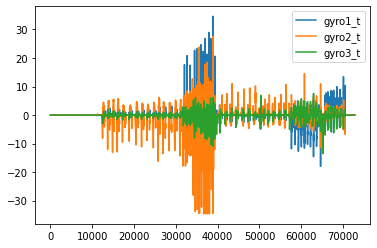

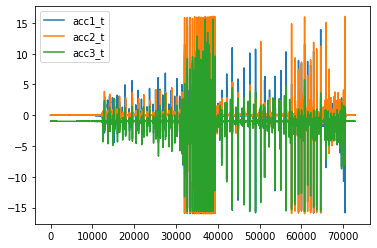

In [8]:
X.plot(y=['gyro1_t','gyro2_t','gyro3_t'], use_index=True)
X.plot(y=['acc1_t','acc2_t','acc3_t'], use_index=True)
plt.show()

Check if there are nan values:

In [9]:
X.isnull().values.any()

False

In [10]:
s = []
for i in range(window-1,-1,-1):
    s = np.concatenate((s, [f'acc1_t{i}', f'acc2_t{i}', f'acc3_t{i}', f'gyro1_t{i}', f'gyro2_t{i}', f'gyro3_t{i}']))
pd.DataFrame(s).T.to_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv', header=None, index=None, mode='a') 
print('Longitude header df',len(s))

Longitude header df 2406


In [11]:
d = []
for row in tqdm(range(len(X)-window+1)): # range(len(X)-window)
    for i in range(0,window):
        d = np.concatenate((d, X.iloc[row+i,:]))
    pd.DataFrame(d).T.to_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv', header=None, index=None, mode='a')    
    d = []

100%|██████████| 72407/72407 [28:15<00:00, 42.71it/s]  


In [12]:
t = pd.read_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv')
t.isnull().values.any()

False

In [13]:
t

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,-0.002282,0.036161,-0.982269,0.002690,0.001292,-0.021956,0.001243,0.034938,-0.978653,0.002432,...,-0.980751,0.004735,-0.000351,-0.019196,-0.000387,0.032107,-0.980945,0.002490,-0.000570,-0.020520
1,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115,0.001579,0.035264,-0.979132,0.000059,...,-0.980945,0.002490,-0.000570,-0.020520,-0.002862,0.033268,-0.981373,0.001935,-0.001200,-0.023816
2,0.001579,0.035264,-0.979132,0.000059,0.003073,-0.021633,-0.001508,0.037628,-0.979723,0.000365,...,-0.981373,0.001935,-0.001200,-0.023816,-0.007833,0.037709,-0.985468,0.003856,0.000086,-0.023872
3,-0.001508,0.037628,-0.979723,0.000365,0.002861,-0.020359,0.000051,0.036303,-0.979173,0.003192,...,-0.985468,0.003856,0.000086,-0.023872,-0.004696,0.039675,-0.982605,0.003495,-0.000608,-0.022969
4,0.000051,0.036303,-0.979173,0.003192,0.003460,-0.020737,0.001090,0.033034,-0.978836,0.001626,...,-0.982605,0.003495,-0.000608,-0.022969,-0.002465,0.038616,-0.979081,0.002737,0.000810,-0.020203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72402,-0.006448,0.045756,-0.982585,-0.001159,-0.002772,-0.021080,-0.004237,0.042792,-0.981760,-0.002072,...,-0.976127,0.002927,-0.002470,-0.021163,-0.007589,0.045685,-0.974324,0.002509,-0.002947,-0.021268
72403,-0.004237,0.042792,-0.981760,-0.002072,-0.001002,-0.020042,-0.003820,0.044911,-0.974986,-0.000879,...,-0.974324,0.002509,-0.002947,-0.021268,-0.008709,0.047824,-0.977176,0.001860,-0.000195,-0.021690
72404,-0.003820,0.044911,-0.974986,-0.000879,0.000363,-0.019025,-0.005175,0.047997,-0.975078,0.001848,...,-0.977176,0.001860,-0.000195,-0.021690,-0.005602,0.047335,-0.977930,0.001909,-0.000729,-0.020360
72405,-0.005175,0.047997,-0.975078,0.001848,0.000328,-0.019616,-0.006957,0.047376,-0.977512,0.001577,...,-0.977930,0.001909,-0.000729,-0.020360,-0.002934,0.046846,-0.980283,-0.000327,-0.002547,-0.019769


<AxesSubplot:>

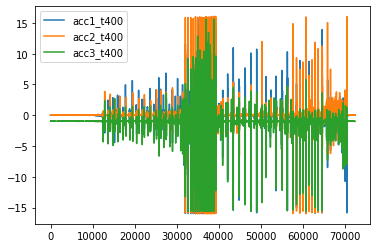

In [14]:
t.iloc[:,0:3].plot()